## Problem Statement

We have been given a PDE: ρ(∂^2)u/(∂t^2)=∇⋅σ+f

- Independent variables: r (input)
- Dependent variables: u (outputs)


We have to find out Vs,Vp,ρ for all r in range [0,R].

Our f is f = ρ(∂^2)u/(∂t^2)-∇⋅σ

In [6]:
import numpy as np

# Read data with comma delimiter
data = np.loadtxt('hello.txt', delimiter=',')

# Split columns

np.random.shuffle(data[:84])

x_train = data[:61, 0:1]  # First column
y_train = data[:61, 1:]  # Columns 2-4
x_train.reshape(-1,1)
y_train.reshape(-1,1)

x_val = data[61:84, 0:1]  # First column
y_val = data[61:84, 1:]  # Columns 2-4

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_train:", x_train)
print("y_train:", y_train)


x_train shape: (61, 1)
y_train shape: (61, 3)
x_train: [[4.421970e+02]
 [1.327957e+03]
 [1.500000e+02]
 [6.284000e+00]
 [1.700000e+02]
 [7.376090e+02]
 [6.884140e+02]
 [1.278762e+03]
 [7.868050e+02]
 [2.500000e+02]
 [2.900000e+02]
 [8.605990e+02]
 [1.200000e+02]
 [3.442410e+02]
 [1.000000e+00]
 [8.360010e+02]
 [1.229566e+03]
 [9.097940e+02]
 [3.929850e+02]
 [9.589900e+02]
 [3.100000e+02]
 [3.200000e+02]
 [0.000000e+00]
 [5.654250e+02]
 [8.114030e+02]
 [1.303360e+03]
 [2.300000e+02]
 [9.835880e+02]
 [1.008186e+03]
 [1.352555e+03]
 [2.800000e+02]
 [1.500142e+03]
 [8.000000e+01]
 [9.343920e+02]
 [2.700000e+02]
 [4.174870e+02]
 [8.000000e+01]
 [3.000000e+02]
 [1.155773e+03]
 [1.000000e+02]
 [6.638160e+02]
 [1.204968e+03]
 [1.377153e+03]
 [1.254164e+03]
 [1.100000e+02]
 [7.130120e+02]
 [1.180370e+03]
 [1.900000e+02]
 [2.200000e+02]
 [4.916660e+02]
 [3.225800e+01]
 [2.000000e+02]
 [5.162290e+02]
 [1.300000e+02]
 [1.106577e+03]
 [3.684820e+02]
 [2.400000e+02]
 [1.800000e+02]
 [1.032783e+03]
 

In [7]:
import tensorflow as tf
import numpy as np

# Define the neural network with Dropout
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden1 = tf.keras.layers.Dense(8, activation='tanh')  # First hidden layer
        self.dropout1 = tf.keras.layers.Dropout(0.2)  # Dropout layer (20% dropout)

        self.hidden2 = tf.keras.layers.Dense(16, activation='tanh')  # Second hidden layer
        self.dropout2 = tf.keras.layers.Dropout(0.2)  # Dropout layer (20% dropout)

        self.hidden3 = tf.keras.layers.Dense(16, activation='tanh')  # Third hidden layer
        self.dropout3 = tf.keras.layers.Dropout(0.2)  # Dropout layer (20% dropout)

        self.hidden4 = tf.keras.layers.Dense(8, activation='tanh')  # Fourth hidden layer
        self.dropout4 = tf.keras.layers.Dropout(0.2)  # Dropout layer (20% dropout)

        self.output_layer = tf.keras.layers.Dense(3, activation=None)  # Output layer with 3 nodes

    def call(self, inputs, training=False):
        x = self.hidden1(inputs)
        x = self.dropout1(x, training=training)  # Apply dropout only during training

        x = self.hidden2(x)
        x = self.dropout2(x, training=training)

        x = self.hidden3(x)
        x = self.dropout3(x, training=training)

        x = self.hidden4(x)
        x = self.dropout4(x, training=training)

        return self.output_layer(x)

# Create the model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Ensure y_train and x_train are numpy arrays
y_train = np.array(y_train)
x_train = np.array(x_train)

# Train the model with training data and using x_val and y_val for validation
history = model.fit(x_train, y_train, epochs=1000, verbose=1, validation_data=(x_val, y_val))


Epoch 1/1000
2/2 [==============================] - 2s 210ms/step - loss: 33.7733 - val_loss: 34.2169
Epoch 2/1000
2/2 [==============================] - 0s 46ms/step - loss: 34.0743 - val_loss: 33.3963
Epoch 3/1000
2/2 [==============================] - 0s 44ms/step - loss: 32.8858 - val_loss: 32.5850
Epoch 4/1000
2/2 [==============================] - 0s 47ms/step - loss: 31.7320 - val_loss: 31.7868
Epoch 5/1000
2/2 [==============================] - 0s 48ms/step - loss: 31.0841 - val_loss: 31.0076
Epoch 6/1000
2/2 [==============================] - 0s 42ms/step - loss: 31.0185 - val_loss: 30.2493
Epoch 7/1000
2/2 [==============================] - 0s 40ms/step - loss: 30.4320 - val_loss: 29.5131
Epoch 8/1000
2/2 [==============================] - 0s 43ms/step - loss: 30.1576 - val_loss: 28.8054
Epoch 9/1000
2/2 [==============================] - 0s 42ms/step - loss: 28.8359 - val_loss: 28.1310
Epoch 10/1000
2/2 [==============================] - 0s 44ms/step - loss: 28.2431 - val_lo

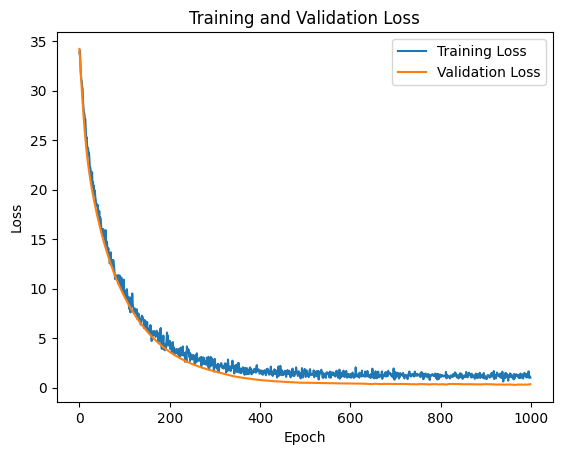

In [8]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


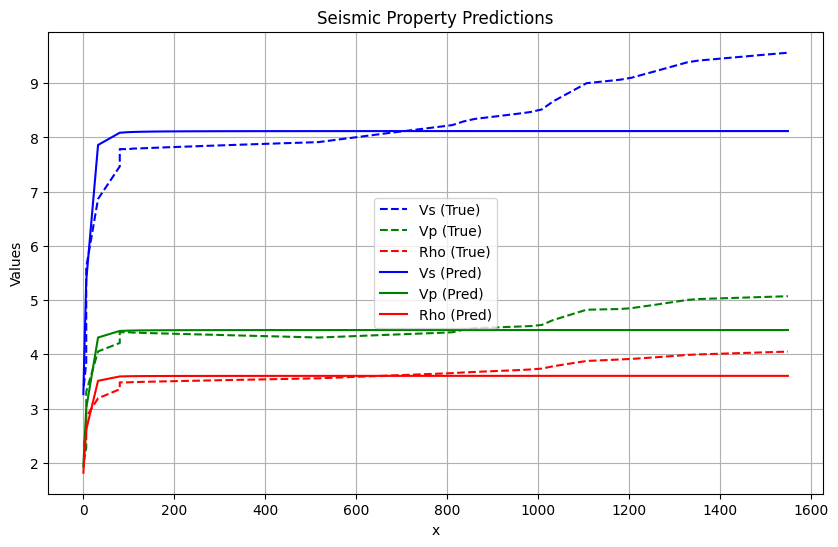

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create a structured dataset
data = np.column_stack((x_train[:, 0], y_train[:, 0], y_train[:, 1], y_train[:, 2]))

# Sort by the first column (x values)
data = data[data[:, 0].argsort()]

# Extract sorted components
x = data[:, 0]
vs = data[:, 1]
vp = data[:, 2]
rho = data[:, 3]

# Model predictions
vs_pred = model.predict(x.reshape(-1, 1))[:, 0]
vp_pred = model.predict(x.reshape(-1, 1))[:, 1]
rho_pred = model.predict(x.reshape(-1, 1))[:, 2]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, vs, label="Vs (True)", linestyle="dashed", color="b")
plt.plot(x, vp, label="Vp (True)", linestyle="dashed", color="g")
plt.plot(x, rho, label="Rho (True)", linestyle="dashed", color="r")

plt.plot(x, vs_pred, label="Vs (Pred)", color="b")
plt.plot(x, vp_pred, label="Vp (Pred)", color="g")
plt.plot(x, rho_pred, label="Rho (Pred)", color="r")

plt.xlabel("x")
plt.ylabel("Values")
plt.legend()
plt.title("Seismic Property Predictions")
plt.grid()
plt.show()
